In [ ]:
import pandas as pd

df = pd.read_excel('data twitter.xlsx')

In [ ]:
df

,tweet,label
0,"Serius ini gua ngerasa aneh gitu lho , didata ...",0
1,Gmana sie ini... lah bukannya bukan mei wabah ...,0
2,Mulai hari ini Pemerintah kembali memberi izin...,0
3,https://bit.ly/2L6CcbB | Seharusnya saat ini...,1
4,Saat ini yang bisa saya lakukan hanya menyiapk...,1
...,...,...
2277,Dari statement para pejabat sejak awal covid-1...,0
2278,Maaf Pak tp rakyat sini ga bs ga d ksh peratur...,0
2279,Bang Anies sedang di kambing hitamkan atas car...,0
2280,Trus kalo vaksin belum ketemu dan tes masal ku...,0


In [ ]:
df['label'].value_counts()

1    1517
0     765
Name: label, dtype: int64

In [ ]:
s1 = df[df['label']==0].sample(1000,replace=True)
s2 = df[df['label']==1].sample(1000,replace=True)
df = pd.concat([s1, s2])

print(df.shape)
print(df['label'].value_counts(normalize=True))

(2000, 2)
0    0.5
1    0.5
Name: label, dtype: float64


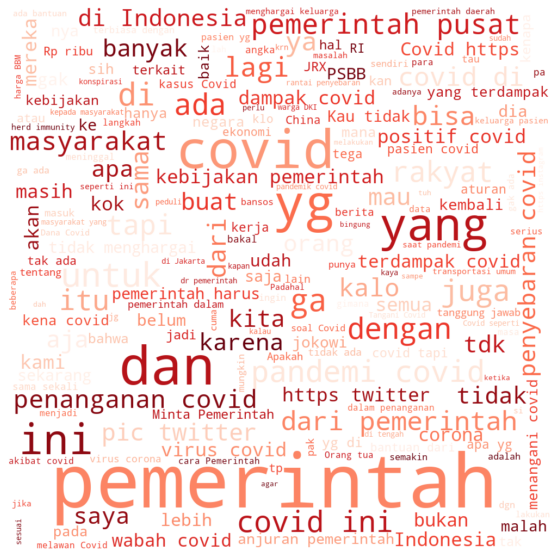

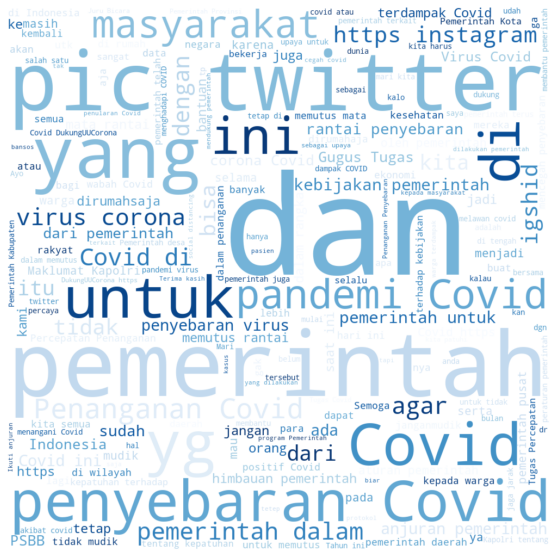

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Kalau 0 artinya TIDAK PATUH terhadap Prokes dan Aturan Pemerintah
train_s0 = df[df['label']==0]
all_text_s0 = ' '.join(word for word in train_s0['tweet'])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA',
                      background_color='white').generate(all_text_s0)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0, y=0)
plt.show()

# Kalau 1 artinya PATUH terhadap Prokes dan Aturan Pemerintah
train_s1 = df[df['label']==1]
all_text_s1 = ' '.join(word for word in train_s1['tweet'])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA',
                      background_color='white').generate(all_text_s1)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0, y=0)
plt.show()

In [ ]:
wf = wordcloud.words_

In [ ]:
import string, re

def cleansing(data):
  # mengecilkan semua huruf
  data = data.lower()

  # menghapus tanda baca
  remove = string.punctuation
  translator = str.maketrans(remove, ' '*len(remove))
  data = data.translate(translator)

  # hapus ASCII dan unicode
  data = data.encode('ascii', 'ignore').decode('utf-8')
  data = re.sub(r'[^\x00-\x7f]', r'', data)

  # hapus enter
  data = data.replace('\n', ' ')

  # hapus hyperlink
  data = re.sub(r'https?:\/\/.*[\r\n]*', '', data)
  data = re.sub(r'https?:\/\/.*[\r\n]*', '', data)
  data = re.sub(r'pic.?:\/\/.*[\r\n]*', '', data)

  return data

In [ ]:
# Melakukan Cleansing Data

review = []
for index, row in df.iterrows():
  review.append(cleansing(row['tweet']))

df['tweet'] = review
df

,tweet,label
1704,nganu tadz mengikuti anjuran dari pemerintah ...,0
1427,dibilangin dirumahaja dulu batu banget sih ...,0
1941,jaka sembung bawa golok cebung emang goblok ...,0
1428,himbauan di pertokoan agar masyarakat mengikut...,0
1241,bagaimana cara berdamainya dgn virus pak semen...,0
...,...,...
941,anggota gabungan fungsi polsek depok barat yan...,1
143,kata who setengah dr kematian covid di eropa ...,1
1064,di tengah pandemi corona covid 19 pemerinta...,1
763,dalam raker di banggar dpr fraksi pks dpr ri ...,1


In [ ]:
df = df.drop_duplicates()
df

,tweet,label
1704,nganu tadz mengikuti anjuran dari pemerintah ...,0
1427,dibilangin dirumahaja dulu batu banget sih ...,0
1941,jaka sembung bawa golok cebung emang goblok ...,0
1428,himbauan di pertokoan agar masyarakat mengikut...,0
1241,bagaimana cara berdamainya dgn virus pak semen...,0
...,...,...
687,yuk mari kita bersama sama membantu dokter dan...,1
310,pemerintah serius menangani pandemi covid 19 d...,1
143,kata who setengah dr kematian covid di eropa ...,1
1064,di tengah pandemi corona covid 19 pemerinta...,1


In [ ]:
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

# Contoh
kalimat = 'Saat menggunakan Python dan library Sastrawi saya dapat melakukan proses Stopword Removal'
stop = stopword.remove(kalimat)
print(stop)

Saat menggunakan Python library Sastrawi dapat melakukan proses Stopword Removal


In [ ]:
# Melakukan StopWord pada data kita

review = []
for index, row in df.iterrows():
  review.append(stopword.remove(row['tweet']))

df['tweet'] = review
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,tweet,label
1704,nganu tadz mengikuti anjuran pemerintah pusat...,0
1427,dibilangin dirumahaja dulu batu banget sih ...,0
1941,jaka sembung bawa golok cebung emang goblok ...,0
1428,himbauan pertokoan masyarakat mengikuti anjura...,0
1241,bagaimana cara berdamainya dgn virus pak covid...,0
...,...,...
687,yuk kita bersama sama membantu dokter petugas ...,1
310,pemerintah serius menangani pandemi covid 19 i...,1
143,kata who setengah dr kematian covid eropa ter...,1
1064,tengah pandemi corona covid 19 pemerintah p...,1


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# contoh
kalimat = 'saya sedang memakan sepotong kue'
katadasar = stemmer.stem(kalimat)
print(katadasar)

saya sedang makan potong kue


In [ ]:
# Stemming Data Kita
review = []
for index, row in df.iterrows():
  review.append(stemmer.stem(row['tweet']))

df['tweet'] = review
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,tweet,label
1704,nganu tadz ikut anjur perintah pusat hindar co...,0
1427,dibilangin dirumahaja dulu batu banget sih 6 p...,0
1941,jaka sembung bawa golok cebung emang goblok pi...,0
1428,himbauan toko masyarakat ikut anjur perintah c...,0
1241,bagaimana cara damai dgn virus pak covid 19 sa...,0
...,...,...
687,yuk kita sama sama bantu dokter tugas medis ca...,1
310,perintah serius tangan pandemi covid 19 indone...,1
143,kata who tengah dr mati covid eropa jadi panti...,1
1064,tengah pandemi corona covid 19 perintah pt tel...,1


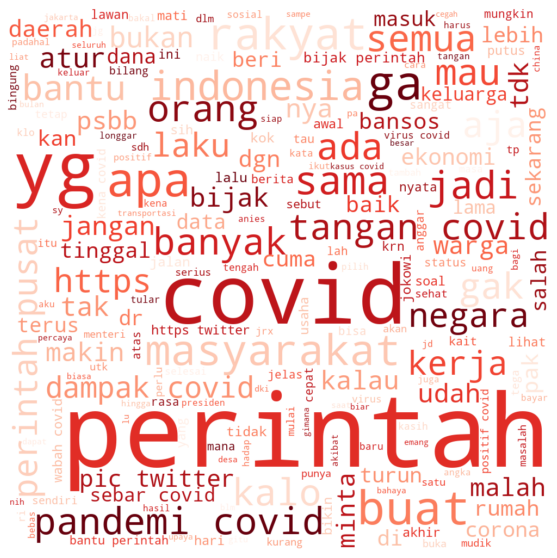

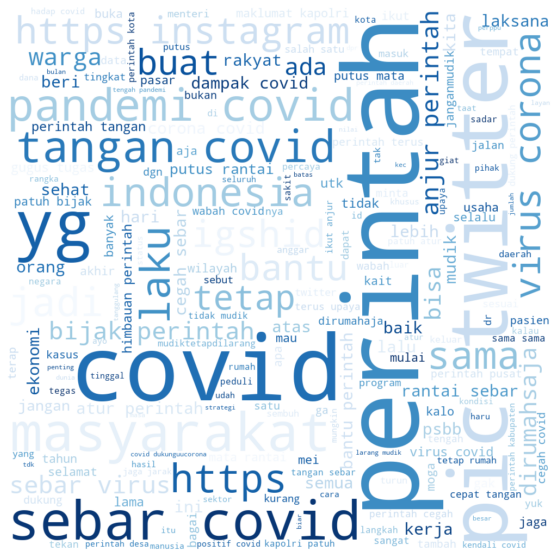

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Kalau 0 artinya TIDAK PATUH terhadap Prokes dan Aturan Pemerintah
train_s0 = df[df['label']==0]
all_text_s0 = ' '.join(word for word in train_s0['tweet'])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA',
                      background_color='white').generate(all_text_s0)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0, y=0)
plt.show()

# Kalau 1 artinya PATUH terhadap Prokes dan Aturan Pemerintah
train_s1 = df[df['label']==1]
all_text_s1 = ' '.join(word for word in train_s1['tweet'])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA',
                      background_color='white').generate(all_text_s1)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0, y=0)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['tweet'],df['label'],
                                                    test_size=0.3, stratify=df['label'],
                                                    random_state=30)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
          'Pusing satu kali',
          'Pusing dua kali',
          'Pusing tiga kali',
          'Pusing lagi'
]
vectorizer = TfidfVectorizer()

# Contoh
X = vectorizer.fit_transform(corpus)
X.toarray()

array([[0.        , 0.49248889, 0.        , 0.40264194, 0.77157901,
        0.        ],
       [0.77157901, 0.49248889, 0.        , 0.40264194, 0.        ,
        0.        ],
       [0.        , 0.49248889, 0.        , 0.40264194, 0.        ,
        0.77157901],
       [0.        , 0.        , 0.88654763, 0.46263733, 0.        ,
        0.        ]])

In [ ]:
# Implementasi pada dokumen kita
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

print(X_train.shape)
print(X_test.shape)

(836, 4514)
(359, 4514)


In [ ]:
def preprocess_data(data):
  # cleansing data
  data = cleansing(data)

  # hapus stopword
  factory = StopWordRemoverFactory()
  stopword = factory.create_stop_word_remover()
  data = stopword.remove(data)

  # stemming
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  data = stemmer.stem(data)

  # count vectorizer
  data = vectorizer.transform([data])

  return data

# SVM

In [ ]:
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

clf = svm.SVC(kernel='linear')

In [ ]:
# Melakukan Prediksi pada Data Test
clf.fit(X_train, y_train)
predict = clf.predict(X_test)

In [ ]:
# Import Library untuk Evaluasi
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix, accuracy_score

In [ ]:
# f1_score
print('f1 score hasil prediksi adalah: ')
print(f1_score(y_test, predict))

# accuracy score
print('accuracy score hasil prediksi adalah: ')
print(accuracy_score(y_test, predict))

# precision score
print('precision score hasil prediksi adalah ')
print(precision_score(y_test, predict))

# recall score
print('recall score hasil prediksi adalah ')
print(recall_score(y_test, predict))

# confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, predict).ravel()
tn, fp, fn, tp

rep = classification_report(y_test, predict)
print(rep)

f1 score hasil prediksi adalah: 
0.7877358490566038
accuracy score hasil prediksi adalah: 
0.7493036211699164
precision score hasil prediksi adalah 
0.7731481481481481
recall score hasil prediksi adalah 
0.8028846153846154
              precision    recall  f1-score   support

           0       0.71      0.68      0.69       151
           1       0.77      0.80      0.79       208

    accuracy                           0.75       359
   macro avg       0.74      0.74      0.74       359
weighted avg       0.75      0.75      0.75       359



# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

clf1 = LogisticRegression()

# Training Data
clf1.fit(X_train, y_train)

# predicting data test
y_pred = clf1.predict(X_test)
print(y_pred)

# Hasil Logistic Regression
# f1_score
print('f1 score hasil prediksi adalah: ')
print(f1_score(y_test, y_pred))

# accuracy score
print('accuracy score hasil prediksi adalah: ')
print(accuracy_score(y_test, y_pred))

# precision score
print('precision score hasil prediksi adalah ')
print(precision_score(y_test, y_pred))

# recall score
print('recall score hasil prediksi adalah ')
print(recall_score(y_test, y_pred))

# confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
tn, fp, fn, tp

rep1 = classification_report(y_test, predict)
print(rep1)

[1 0 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 1 1
 0 0 1 0 1 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 0 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 0
 1 0 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 1 0 1 1 0
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0
 0 0 0 1 1 0 0 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 0 0 0 1 0 1 0 1 1 1 0 1 0 1
 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 0 0 1 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0
 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 1
 1 0 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 0 0 0 0 1 1 1 0 1
 1 0 1 1 0 1 0 0 1 1 0 0 0 0 1 1 0 1 0 1 1 1 0 0 1 1]
f1 score hasil prediksi adalah: 
0.7891156462585034
accuracy score hasil prediksi adalah: 
0.7409470752089137
precision score hasil prediksi adalah 
0.7467811158798283
recall score hasil prediksi adalah 
0.8365384615384616
              precision    recall  f1-score   su

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf4 = DecisionTreeClassifier()
clf4.fit(X_train, y_train)

# predicting data test
y_pred4 = clf4.predict(X_test)
print(y_pred4)

# Hasil Logistic Regression
# f1_score
print('f1 score hasil prediksi adalah: ')
print(f1_score(y_test, y_pred4))

# accuracy score
print('accuracy score hasil prediksi adalah: ')
print(accuracy_score(y_test, y_pred4))

# precision score
print('precision score hasil prediksi adalah ')
print(precision_score(y_test, y_pred4))

# recall score
print('recall score hasil prediksi adalah ')
print(recall_score(y_test, y_pred4))

# confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred4).ravel()
tn, fp, fn, tp

rep4 = classification_report(y_test, predict)
print(rep4)

[1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 0 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 0 0 0 0 1 0 0 1 0 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1 1 1 0
 0 0 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0
 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 0 1 0 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 1 0
 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 0 0 0 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 0
 0 0 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 1 0 1 1 1 1 0 1 0
 1 0 1 1 0 0 1 1 0 1 1 0 0 1 1 1 0 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1
 1 0 0 1 1 1 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1
 1 1 1 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1
 1 0 0 0 0 0 0 0 1 1 1 0 1 0 1 1 0 1 1 0 0 1 1 0 1 1]
f1 score hasil prediksi adalah: 
0.7173396674584323
accuracy score hasil prediksi adalah: 
0.6685236768802229
precision score hasil prediksi adalah 
0.7089201877934272
recall score hasil prediksi adalah 
0.7259615384615384
              precision    recall  f1-score   su

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf2 = RandomForestClassifier()
clf2.fit(X_train, y_train)

# predicting data test
y_pred2 = clf2.predict(X_test)
print(y_pred2)

# Hasil Logistic Regression
# f1_score
print('f1 score hasil prediksi adalah: ')
print(f1_score(y_test, y_pred2))

# accuracy score
print('accuracy score hasil prediksi adalah: ')
print(accuracy_score(y_test, y_pred2))

# precision score
print('precision score hasil prediksi adalah ')
print(precision_score(y_test, y_pred2))

# recall score
print('recall score hasil prediksi adalah ')
print(recall_score(y_test, y_pred2))

# confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred2).ravel()
tn, fp, fn, tp

rep2 = classification_report(y_test, predict)
print(rep2)

[1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 1 1 1 0 0 0 1 1 1 1
 0 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0
 0 0 1 0 1 0 1 1 1 1 1 1 0 0 1 0 0 0 0 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 0 0
 1 0 1 1 1 1 1 0 0 0 0 1 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 0 0 0 1 1 0
 1 1 0 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 1 1 0 1 1 1 0 1 1 0 1 0
 0 0 0 1 1 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 0 1 0 1 0 0 1 1 1 1 0 0 0 1
 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1 1 1 1 1 0 0
 1 0 0 0 1 1 1 0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 1 0 1
 0 0 1 0 0 1 1 1 1 0 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 0 1 1 0 1 0 0 1 1 1 0 1
 1 0 1 1 0 1 0 0 1 1 1 0 1 0 1 1 0 1 0 1 1 1 0 0 1 1]
f1 score hasil prediksi adalah: 
0.7670588235294117
accuracy score hasil prediksi adalah: 
0.724233983286908
precision score hasil prediksi adalah 
0.7511520737327189
recall score hasil prediksi adalah 
0.7836538461538461
              precision    recall  f1-score   sup